<a href="https://colab.research.google.com/github/samiha-mahin/A-Machine-Learning-Models-Repo/blob/main/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AdaBoost (Adaptive Boosting)**

### 🌟 What is AdaBoost?

**AdaBoost** is a machine learning **ensemble technique** — it combines **many weak learners** (usually simple decision trees) to make a **strong prediction model**.

* **“Weak learner”** = a model that performs just slightly better than guessing.
* **“Strong learner”** = a powerful model built by combining many weak learners.

Think of AdaBoost like a **team of students** answering a quiz:

* Each student (model) is not that smart alone.
* But together, with a smart strategy, their combined answers are very accurate.

---

### 🔄 How AdaBoost Works (step-by-step, simply):

#### 🎯 Goal: Improve accuracy by focusing on mistakes.

---

### 🎓 Real-Life Example: Identifying Cats and Dogs

You have 10 images of animals. The task is to classify each image as a **cat** or a **dog**.

#### Step 1: Train the 1st weak model

* It tries to classify all 10 images.
* It gets 7 correct, but makes 3 mistakes.

#### Step 2: Boosting begins!

* AdaBoost notices which 3 images were **wrong**.
* It **gives more importance (weight)** to those 3 mistakes.

#### Step 3: Train 2nd weak model

* It tries again — now it's **forced to focus more** on the 3 hard images.
* It still makes some mistakes, maybe on different images.

#### Step 4: Keep repeating

* AdaBoost keeps adding new weak models.
* Each one focuses more on **what previous models got wrong**.
* The final prediction is a **weighted vote** from all the weak models.

---

### 📦 Final Result:

Even though each weak model is just okay alone, **together** they build a **very accurate classifier**.

---

### 💡 Key Concepts to Remember:

| Concept              | Explanation                                                      |
| -------------------- | ---------------------------------------------------------------- |
| **Weak Learner**     | A simple model (e.g., decision stump — a 1-split decision tree)  |
| **Boosting**         | Focus more on difficult samples with each round                  |
| **Weighted Samples** | Mistakes get higher weight in the next round                     |
| **Ensemble**         | Final output is the combined vote of all weak learners           |
| **Adaptive**         | It adapts by changing focus based on errors of previous learners |

---

### 🔥 Why AdaBoost is Powerful:

* It **adapts** to errors — unlike bagging (like Random Forest), which uses randomness.
* Works well on **clean, small to medium datasets**.
* **Resistant to overfitting** (if not too many rounds).
* Can be used for **classification and regression** tasks.

---

### 🚫 Limitations:

* **Sensitive to noisy data** and **outliers** (because it gives them more weight).
* Doesn’t work well if your weak learner is too strong (it needs them to be simple!).

---

### ✅ Summary (like a checklist):

* \[✓] Combines weak learners into one strong model
* \[✓] Learns from mistakes and focuses on hard examples
* \[✓] Makes final predictions by weighted majority vote
* \[✓] Good for boosting accuracy on clean datasets




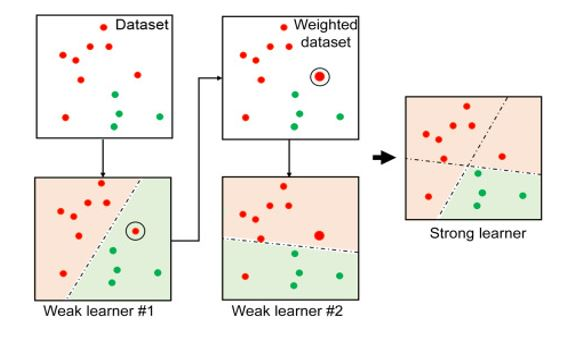

# **1. AdaBoost for Titanic Dataset (Classification)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('/content/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Define column types
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

In [ ]:
 #Preprocessing steps
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), #This handles missing values in categorical columns (like 'Sex' or 'Embarked')
    ('encoder', OneHotEncoder(handle_unknown='ignore')) #This converts categorical text values into numbers (0,1)
])

In [ ]:
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [ ]:
#Build full pipeline with AdaBoost
clf = Pipeline([
    ('preprocess', preprocessor),
    ('model', AdaBoostClassifier(n_estimators=50, random_state=42))
])

clf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('model', AdaBoostClassifier(random_state=42))])

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy on Titanic: {accuracy:.2f}")

AdaBoost Accuracy on Titanic: 0.80


# **2. AdaBoost for California Housing Dataset (Regression)**

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [ ]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train AdaBoost regressor
model = AdaBoostRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

AdaBoostRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"AdaBoost Mean Squared Error on California Housing: {mse:.3f}")

AdaBoost Mean Squared Error on California Housing: 0.614


# **Important Note:**



### 🎯 **Why we used Mean Squared Error (MSE) instead of Accuracy Score:**

* The **California Housing dataset** is a **regression problem**, not classification.
* That means we're **predicting continuous values** (like house prices), **not categories** (like "survived" or "not survived").

---

### 🧠 Accuracy Score is only for classification

* Accuracy score checks if the **predicted class = actual class**, like in Titanic (0 or 1).
* In **regression**, there’s no class — predictions are real numbers like `2.1`, `3.5`, etc.
* So, **mean squared error (MSE)**, **mean absolute error (MAE)**, or **R² score** are used instead.



